(1414, 128, 4)
17
128


Telescope EVLA is not in known_telescopes.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 144.9660084899519 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
FigureCanvasAgg is non-interactive, and thus cannot be shown


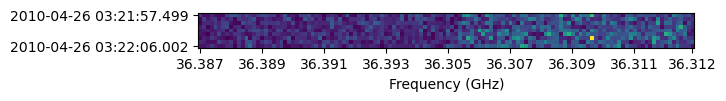

In [125]:
  >>> import os
  >>> from astropy.time import Time
  >>> import numpy as np
  >>> import matplotlib.pyplot as plt
  >>> from pyuvdata import UVData
  >>> from pyuvdata.data import DATA_PATH
  >>> filename = os.path.join(DATA_PATH, 'day2_TDEM0003_10s_norx_1scan.uvfits')
  >>> uvd = UVData.from_file(filename, use_future_array_shapes=True)

  >>> print(uvd.data_array.shape)
  (1414, 128, 4)
  >>> print(uvd.Ntimes)
  17
  >>> print(uvd.Nfreqs)
  128
  >>> # get the data for a single baseline and polarization
  >>> waterfall_data = uvd.get_data((1, 2, uvd.polarization_array[0]))
  >>> # get the corresponding times for this waterfall
  >>> waterfall_times = Time(uvd.get_times((1, 2, uvd.polarization_array[0])), format="jd").iso

  >>> # Amplitude waterfall for all spectral channels and 0th polarization
  >>> fig, ax = plt.subplots(1, 1)
  >>> _ = ax.imshow(np.abs(waterfall_data), interpolation='none')
  >>> _ = ax.set_yticks([0, waterfall_times.size - 1])
  >>> _ = ax.set_yticklabels([waterfall_times[0], waterfall_times[1]])
  >>> freq_tick_inds = np.concatenate((np.arange(0, uvd.Nfreqs, 16), [uvd.Nfreqs-1]))
  >>> _ = ax.set_xticks(freq_tick_inds)
  >>> _ = ax.set_xticklabels([f"{val:.3f}" for val in uvd.freq_array[freq_tick_inds]*1e-9])
  >>> _ = ax.set_xlabel("Frequency (GHz)") 
  >>> fig.show() # doctest: +SKIP
  # >>> plt.savefig("Images/amplitude_waterfall.png")
  # >>> plt.clf()



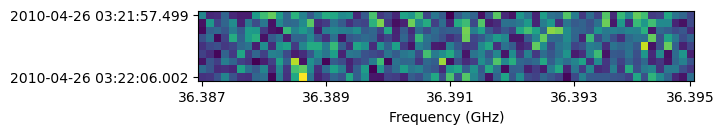

In [128]:

  >>> # The plot above has a distcontinuity in the frequency axis because this
  >>> # data set has spectral windows. Let's just plot the 0th one
  >>> window_sel = uvd.flex_spw_id_array == 0
  >>> freqs_use = uvd.freq_array[window_sel]
  >>> fig, ax = plt.subplots(1, 1)
  >>> _ = plt.imshow(np.abs(waterfall_data[:,  window_sel]))
  >>> _ = ax.set_yticks([0, waterfall_times.size - 1])
  >>> _ = ax.set_yticklabels([waterfall_times[0], waterfall_times[1]])
  >>> freq_tick_inds = np.concatenate((np.arange(0, freqs_use.size, 16), [freqs_use.size-1]))
  >>> _ = ax.set_xticks(freq_tick_inds)
  >>> _ = ax.set_xticklabels([f"{val:.3f}" for val in freqs_use[freq_tick_inds]*1e-9])
  >>> _ = ax.set_xlabel("Frequency (GHz)") 
  >>> plt.show() # doctest: +SKIP
  # ...     plt.savefig("Images/amplitude_waterfall_spw0.png")
  # ...     plt.clf()
